# **LAB-05** ***Polarimetry***

<ipython-input-11-a45431db88d0>:12: RuntimeWarning: divide by zero encountered in log
  combined_data = np.log(hh_data) - np.log(hv_data)
<ipython-input-11-a45431db88d0>:12: RuntimeWarning: invalid value encountered in subtract
  combined_data = np.log(hh_data) - np.log(hv_data)


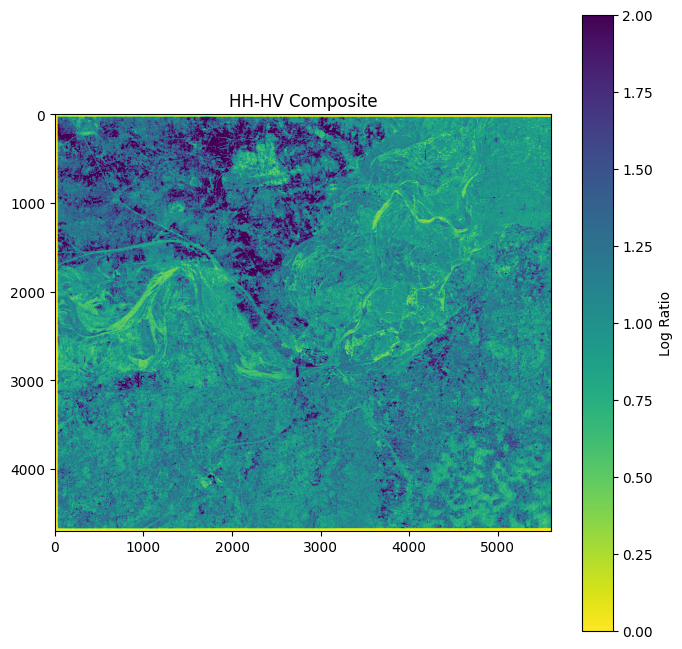

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
# Paths to your HH and HV TIFF files
hh_tif_path = "//content/drive/MyDrive/LAB_O5 DIP/HH-ALPSRP245160540-H2.2_UA.tif"
hv_tif_path = "//content/drive/MyDrive/LAB_O5 DIP/HV-ALPSRP245160540-H2.2_UA.tif"
# Open the TIFF files using rasterio
with rasterio.open(hh_tif_path) as hh_dataset, rasterio.open(hv_tif_path) as hv_dataset:
    hh_data = hh_dataset.read(1)  # Read the first band
    hv_data = hv_dataset.read(1)  # Read the first band
# Calculate the log ratio
combined_data = np.log(hh_data) - np.log(hv_data)
plt.figure(figsize=(8, 8))
plt.imshow(combined_data, cmap='viridis_r', vmin=0, vmax=2)  # Adjust vmin and vmax as needed
plt.colorbar(label="Log Ratio")
plt.title("HH-HV Composite")
plt.show()

# ***Normalized Method***

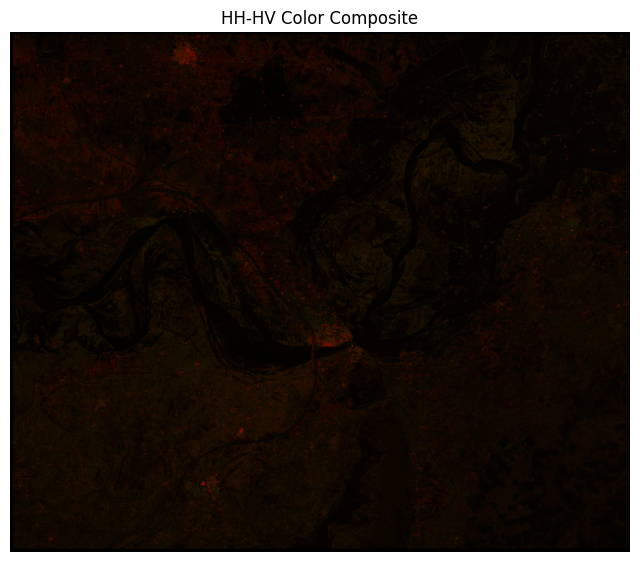

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
# Paths to your HH and HV TIFF files
hh_tif_path = "//content/drive/MyDrive/LAB_O5 DIP/HH-ALPSRP245160540-H2.2_UA.tif"
hv_tif_path = "//content/drive/MyDrive/LAB_O5 DIP/HV-ALPSRP245160540-H2.2_UA.tif"
# Open the TIFF files using rasterio
with rasterio.open(hh_tif_path) as hh_dataset, rasterio.open(hv_tif_path) as hv_dataset:
    hh_data = hh_dataset.read(1)  # Read the first band
    hv_data = hv_dataset.read(1)  # Read the first band
# Normalize the data to a common range for visualization
hh_normalized = (hh_data - np.min(hh_data)) / (np.max(hh_data) - np.min(hh_data))
hv_normalized = (hv_data - np.min(hv_data)) / (np.max(hv_data) - np.min(hv_data))
# Create the color composite
rgb_image = np.zeros((hh_data.shape[0], hv_data.shape[1], 3), dtype=np.float32)
rgb_image[:, :, 0] = hh_normalized  # Red channel for HH
rgb_image[:, :, 1] = hv_normalized  # Green channel for HV
# Clip values to ensure they are within the valid range [0, 1]
rgb_image = np.clip(rgb_image, 0, 1)
plt.figure(figsize=(8, 8))
plt.imshow(rgb_image)
plt.title("HH-HV Color Composite")
plt.axis('off')  # Turn off axes
plt.show()
# Choose a colormap that highlights the HV data
colormap = plt.get_cmap("cividis")  # You can try other colormaps as well

# ***Normalized (Seismic)***

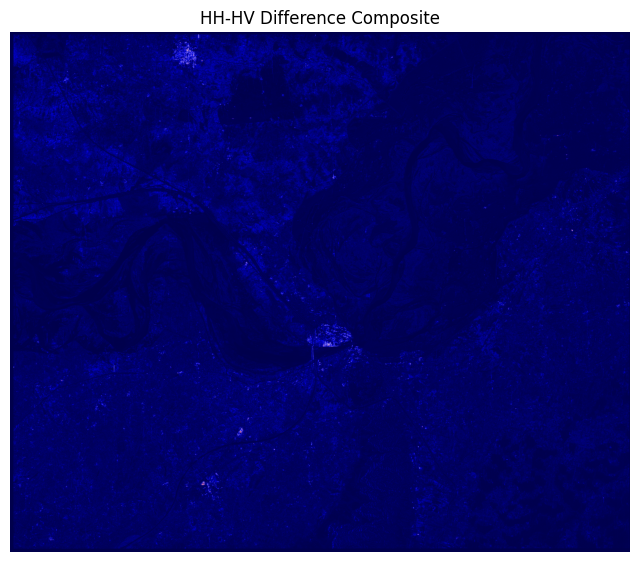

In [ ]:

import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Paths to your HH and HV TIFF files
hh_tif_path = "//content/drive/MyDrive/LAB_O5 DIP/HH-ALPSRP245160540-H2.2_UA.tif"
hv_tif_path = "//content/drive/MyDrive/LAB_O5 DIP/HV-ALPSRP245160540-H2.2_UA.tif"

# Open the TIFF files using rasterio
with rasterio.open(hh_tif_path) as hh_dataset, rasterio.open(hv_tif_path) as hv_dataset:
    hh_data = hh_dataset.read(1)  # Read the first band
    hv_data = hv_dataset.read(1)  # Read the first band

# Normalize the intensity values of HH and HV data to the [0, 1] range
hh_normalized = (hh_data - np.min(hh_data)) / (np.max(hh_data) - np.min(hh_data))
hv_normalized = (hv_data - np.min(hv_data)) / (np.max(hv_data) - np.min(hv_data))

# Calculate the difference between HH and HV
difference = hh_normalized - hv_normalized
# Choose a colormap that emphasizes contrasts
colormap = plt.get_cmap("seismic")  # Diverging colormap
# Apply the colormap to the difference image
difference_colormap = (colormap(difference)[:, :, :3] * 255).astype(np.uint8)
# Display the difference composite image
plt.figure(figsize=(8, 8))
plt.imshow(difference_colormap)
plt.title("HH-HV Difference Composite")
plt.axis('off')  # Turn off axes
plt.show()